In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dem_candidates = pd.read_csv('dem_candidates.csv')
rep_candidates = pd.read_csv('rep_candidates.csv', encoding='latin-1')
lobbyist_bundle = pd.read_csv('lobbyist_bundle.csv')

In [3]:
print(dem_candidates.shape)


(811, 32)


In [4]:
print(rep_candidates.shape)


(774, 25)


In [5]:
dem_candidates['Political Party'] = 'Democratic'
rep_candidates['Political Party'] = 'Republican'

In [6]:
candidates = pd.concat([dem_candidates, rep_candidates])
candidates.shape

(1585, 46)

In [7]:
candidates.to_csv('candidates.csv')

In [8]:
dem_df = candidates[candidates['Political Party'] == 'Democratic']
dem_df.shape

(811, 46)

In [9]:
float_columns = dem_df.select_dtypes(include=['float64']).columns 
float_columns

Index(['Partisan Lean', 'Primary %'], dtype='object')

Avg primary % difference: 4.471699226451104


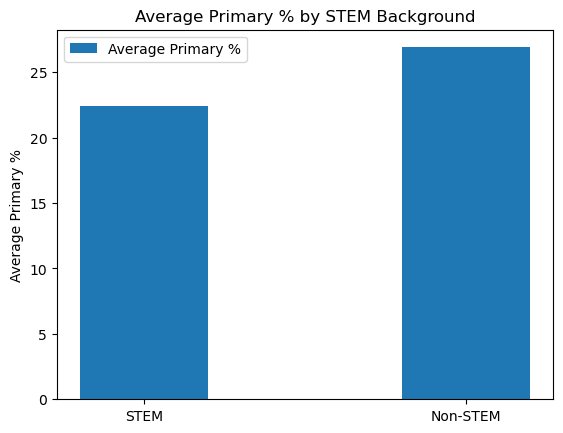

In [10]:
# Exclude unopposed candidates and candidates nominated by convention (not primary) (data points where primary % = 100)
stem_filter = (dem_df['STEM?'] == 'Yes') & (dem_df['Primary %'] != 100)
non_stem_filter = (dem_df['STEM?'] == 'No') & (dem_df['Primary %'] != 100)
avg_primary_percent = [(dem_df[stem_filter])['Primary %'].mean(), (dem_df[non_stem_filter])['Primary %'].mean()]
x = np.arange(2)
fig, ax = plt.subplots()
bars = ax.bar(x, avg_primary_percent, width = 0.4, label='Average Primary %')
ax.set_ylabel('Average Primary %')
ax.set_title('Average Primary % by STEM Background')
ax.set_xticks(x)
ax.set_xticklabels(['STEM', 'Non-STEM'])
ax.legend()
print('Avg primary % difference:', abs(avg_primary_percent[0] - avg_primary_percent[1]))

Avg Partisan Lean difference: 1.605010304330035


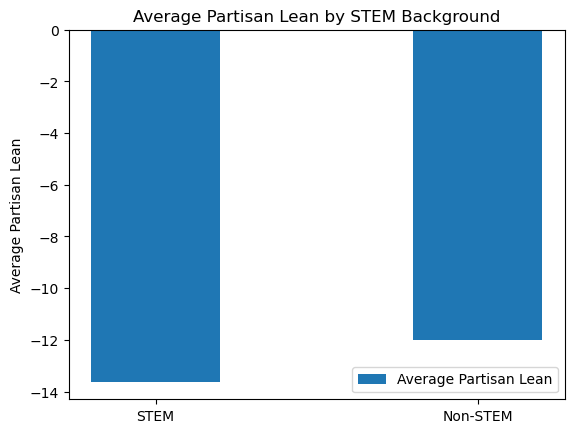

In [11]:
avg_partisan_lean = [((dem_df[stem_filter])['Partisan Lean']).mean(), ((dem_df[non_stem_filter])['Partisan Lean']).mean()]
x = np.arange(2)
fig, ax = plt.subplots()
bars = ax.bar(x, avg_partisan_lean, width = 0.4, label='Average Partisan Lean')
ax.set_ylabel('Average Partisan Lean')
ax.set_title('Average Partisan Lean by STEM Background')
ax.set_xticks(x)
ax.set_xticklabels(['STEM', 'Non-STEM'])
ax.legend()
print('Avg Partisan Lean difference:', abs(avg_partisan_lean[0] - avg_partisan_lean[1]))

In [12]:
stem_num = (dem_df[stem_filter])['Primary %'].shape[0]
print('# of STEM Democratic candidates:', stem_num)

# of STEM Democratic candidates: 138


In [13]:
non_stem_num = (dem_df[non_stem_filter])['Primary %'].shape[0]
print('# of Non-STEM Democratic candidates:', non_stem_num)

# of Non-STEM Democratic candidates: 619


In [14]:
print('% of STEM Democratic candidates:', round(stem_num / (stem_num + non_stem_num), 2))
print('% of Non-STEM Democratic candidates:', round(non_stem_num / (non_stem_num + stem_num), 2))

% of STEM Democratic candidates: 0.18
% of Non-STEM Democratic candidates: 0.82


Based on the two graphs above, we can see that the average primary % is almost 5% lower and the average partisan lean is almost 2 lower for having a STEM background. This suggests that on average, having a STEM background may put a candidate at a slight disadvantage when it comes to winning the election. However this is not a strong indication due to the disproportionate balance of data points between STEM and non-STEM. The % of STEM Democratic candidates is much lower, with only 18% of the data points being STEM and 82% being non-STEM (there are only 138 data points for STEM candidates compared to 619). Some possible reasons for the disproportionate balance of data points between STEM and non-STEM: people with a STEM background are less likely to be eligible to be a candidate for the primary election since there are way more non-STEM candidates than STEM candidates, people with a non-STEM background are more likely to sign up to be eligible to be a candidate than people with a STEM background (for whatever reason(s)). So having a STEM background might not be a strong factor in a candidate's likelihood of winning the primary election.